<a href="https://colab.research.google.com/github/vikramkrishnan9885/BasicApp/blob/master/01MixUp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep Learning advancement is credited to faster compute power and to huge datasets. But for many real problems, the dataset is hard to come by. The best way to regularize your model or make it more robust is to feed in more data, but how can one get more data?

The easiest answer is to go out and collect more data, but that can either be expensive or physically impossible. One can think of generating new data samples using generative models like GAN but that can be unnecessary in many cases. The easiest way to train a model on a wide variety of data is to use Data Augmentation. This significantly increases the diversity of data available for training our models, without actually collecting new data samples.

Simple image data augmentation techniques like flipping, random crop, random rotation, etc are commonly used to train large models. This works well for most of the toy dataset and problem statements. But in reality, there can be huge data shift. Is our model robust to data shift and data corruption? As it stands models don't robustly generalize for shifts in data. If models could identify when they are likely to be mistaken, or estimate uncertainty accurately, then the impact of such fragility might be reduced. Unfortunately, the models are overconfident about its prediction.



In [9]:
!apt install texlive texlive-latex-extra texlive-fonts-recommended dvipng

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  ghostscript gsfonts javascript-common libcupsfilters1 libcupsimage2 libgs9
  libgs9-common libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0
  libptexenc1 libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13
  lmodern poppler-data preview-latex-style rake ruby ruby-did-you-mean
  ruby-minitest ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-recommended
  texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto ghostscript-x apache2 | lighttpd | httpd poppler-utils


In [11]:
!apt-get install cm-super

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cm-super-minimal pfb2t1c2pfb
The following NEW packages will be installed:
  cm-super cm-super-minimal pfb2t1c2pfb
0 upgraded, 3 newly installed, 0 to remove and 5 not upgraded.
Need to get 24.5 MB of archives.
After this operation, 59.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 cm-super-minimal all 0.3.4-11 [5,810 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 pfb2t1c2pfb amd64 0.3-11 [9,342 B]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 cm-super all 0.3.4-11 [18.7 MB]
Fetched 24.5 MB in 1s (19.0 MB/s)
Selecting previously unselected package cm-super-minimal.
(Reading database ... 149879 files and directories 

In [15]:
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip #3
! unzip type1cm.zip -d /tmp/type1cm #4
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins  #5
! sudo mkdir /usr/share/texmf/tex/latex/type1cm #6
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm #7
! sudo texhash #8

--2022-11-27 18:36:41--  http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip
Resolving mirrors.ctan.org (mirrors.ctan.org)... 5.35.249.60
Connecting to mirrors.ctan.org (mirrors.ctan.org)|5.35.249.60|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mirrors.concertpass.com/tex-archive/macros/latex/contrib/type1cm.zip [following]
--2022-11-27 18:36:41--  https://mirrors.concertpass.com/tex-archive/macros/latex/contrib/type1cm.zip
Resolving mirrors.concertpass.com (mirrors.concertpass.com)... 162.219.248.112
Connecting to mirrors.concertpass.com (mirrors.concertpass.com)|162.219.248.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 328566 (321K) [application/zip]
Saving to: ‘type1cm.zip’

type1cm.zip         100%[===================>] 320.87K  1.66MB/s    in 0.2s    

2022-11-27 18:36:41 (1.66 MB/s) - ‘type1cm.zip’ saved [328566/328566]

Archive:  type1cm.zip
   creating: /tmp/type1cm/type1cm/
  inflating: /tmp/type1cm/

In [17]:
! wget http://mirrors.ctan.org/macros/latex/contrib/textgreek.zip #3
! unzip textgreek.zip -d /tmp/textgreek #4
! cd /tmp/textgreek/textgreek/ && sudo latex textgreek.ins  #5
! sudo mkdir /usr/share/texmf/tex/latex/textgreek #6
! sudo cp /tmp/textgreek/textgreek/textgreek.sty /usr/share/texmf/tex/latex/textgreek #7
! sudo texhash #8

--2022-11-27 18:38:23--  http://mirrors.ctan.org/macros/latex/contrib/textgreek.zip
Resolving mirrors.ctan.org (mirrors.ctan.org)... 5.35.249.60
Connecting to mirrors.ctan.org (mirrors.ctan.org)|5.35.249.60|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ctan.math.utah.edu/ctan/tex-archive/macros/latex/contrib/textgreek.zip [following]
--2022-11-27 18:38:24--  https://ctan.math.utah.edu/ctan/tex-archive/macros/latex/contrib/textgreek.zip
Resolving ctan.math.utah.edu (ctan.math.utah.edu)... 155.101.98.136
Connecting to ctan.math.utah.edu (ctan.math.utah.edu)|155.101.98.136|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 475641 (464K) [application/zip]
Saving to: ‘textgreek.zip’

textgreek.zip       100%[===================>] 464.49K  1.56MB/s    in 0.3s    

2022-11-27 18:38:25 (1.56 MB/s) - ‘textgreek.zip’ saved [475641/475641]

Archive:  textgreek.zip
   creating: /tmp/textgreek/textgreek/
  inflating: /tmp/textgreek/text

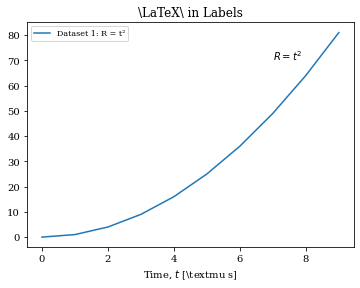

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Settings
A = 6  # Want figures to be A6
plt.rc('figure', figsize=[46.82 * .5**(.5 * A), 33.11 * .5**(.5 * A)])
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Create some data
x = np.arange(10)
y = x**2

# Plot
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
})
plt.plot(x, y, label=r'Dataset 1: R = t²')
plt.title(r'\LaTeX\ in Labels')
plt.xlabel(r'Time, $t$ [\textmu s]')
plt.text(7, 70, r'$R = t^2$')
plt.legend(fontsize=8)

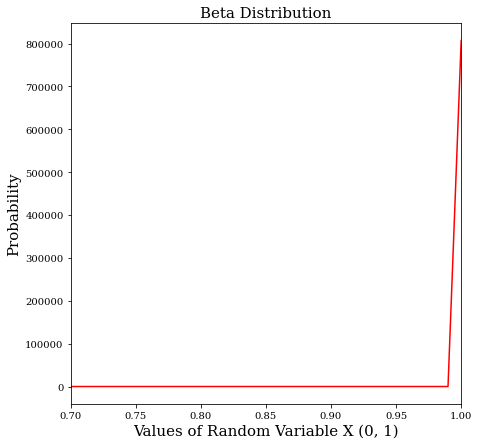

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
#
# Set the shape paremeters
#
a, b = 0.2, 0.2
#
# Generate the value between
#
x = np.linspace(beta.ppf(0.01, a, b),beta.ppf(0.99, a, b), 100)
#
# Plot the beta distribution
#
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
})
plt.figure(figsize=(7,7))
plt.xlim(0.7, 1)
plt.plot(x, beta.pdf(x, a, b), 'r-')
plt.title(r'Beta Distribution', fontsize='15')
plt.xlabel(r'Values of Random Variable X (0, 1)', fontsize='15')
plt.ylabel(r'Probability', fontsize='15')
plt.show()



_mixup_ is a *domain-agnostic* data augmentation technique proposed in [mixup: Beyond Empirical Risk Minimization](https://arxiv.org/abs/1710.09412)
by Zhang et al. It's implemented with the following formulas:

![](https://i.ibb.co/DRyHYww/image.png)

(Note that the lambda values are values with the [0, 1] range and are sampled from the
[Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution).)

The technique is quite systematically named. We are literally mixing up the features and
their corresponding labels. Implementation-wise it's simple. Neural networks are prone
to [memorizing corrupt labels](https://arxiv.org/abs/1611.03530). mixup relaxes this by
combining different features with one another (same happens for the labels too) so that
a network does not get overconfident about the relationship between the features and
their labels.

mixup is specifically useful when we are not sure about selecting a set of augmentation
transforms for a given dataset, medical imaging datasets, for example. mixup can be
extended to a variety of data modalities such as computer vision, naturallanguage
processing, speech, and so on.

While the traditional data augmentation like those provided in Keras ImageDataGenerator class consistently leads to improved generalization, the procedure is dataset-dependent, and thus requires the use of expert knowledge.

Besides, data augmentation does not model the relation across examples of different classes.

On the other hand,
* Mixup is a data-agnostic data augmentation routine.
* It makes decision boundaries transit linearly from class to class, providing a smoother estimate of uncertainty.
* It reduces the memorization of corrupt labels,
* It increases the robustness to the adversarial examples and stabilizes the training of generative adversarial networks.

# Setup

In [23]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers

# Prepare the dataset

In this example, we will be using the FashionMNIST

In [24]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_train = np.reshape(x_train, (-1, 28, 28, 1))
y_train = tf.one_hot(y_train, 10)

x_test = x_test.astype("float32") / 255.0
x_test = np.reshape(x_test, (-1, 28, 28, 1))
y_test = tf.one_hot(y_test, 10)

4422102/4422102 [==============================] - 0s 0us/step


# Define hyperparameters

In [26]:
AUTO = tf.data.AUTOTUNE
BATCH_SIZE = 64
EPOCHS = 10

# Convert the data into TensorFlow Dataset objects

In [27]:
# Put aside a few samples to create our validation set
val_samples = 2000
x_val, y_val = x_train[:val_samples], y_train[:val_samples]
new_x_train, new_y_train = x_train[val_samples:], y_train[val_samples:]

train_ds_one = (
    tf.data.Dataset.from_tensor_slices((new_x_train, new_y_train))
    .shuffle(BATCH_SIZE * 100)
    .batch(BATCH_SIZE)
)
train_ds_two = (
    tf.data.Dataset.from_tensor_slices((new_x_train, new_y_train))
    .shuffle(BATCH_SIZE * 100)
    .batch(BATCH_SIZE)
)
# Because we will be mixing up the images and their corresponding labels, we will be
# combining two shuffled datasets from the same training data.
train_ds = tf.data.Dataset.zip((train_ds_one, train_ds_two))

val_ds = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(BATCH_SIZE)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(BATCH_SIZE)

# Define the mixup technique function

To perform the mixup routine, we create new virtual datasets using the training data from
the same dataset, and apply a lambda value within the [0, 1] range sampled from a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution)
— such that, for example, `new_x = lambda * x1 + (1 - lambda) * x2` (where
`x1` and `x2` are images) and the same equation is applied to the labels as well.

In [28]:
def sample_beta_distribution(size, concentration_0=0.2, concentration_1=0.2):
    gamma_1_sample = tf.random.gamma(shape=[size], alpha=concentration_1)
    gamma_2_sample = tf.random.gamma(shape=[size], alpha=concentration_0)
    return gamma_1_sample / (gamma_1_sample + gamma_2_sample)


def mix_up(ds_one, ds_two, alpha=0.2):
    # Unpack two datasets
    images_one, labels_one = ds_one
    images_two, labels_two = ds_two
    batch_size = tf.shape(images_one)[0]

    # Sample lambda and reshape it to do the mixup
    l = sample_beta_distribution(batch_size, alpha, alpha)
    x_l = tf.reshape(l, (batch_size, 1, 1, 1))
    y_l = tf.reshape(l, (batch_size, 1))

    # Perform mixup on both images and labels by combining a pair of images/labels
    # (one from each dataset) into one image/label
    images = images_one * x_l + images_two * (1 - x_l)
    labels = labels_one * y_l + labels_two * (1 - y_l)
    return (images, labels)

**Note** that here , we are combining two images to create a single one. Theoretically,
we can combine as many we want but that comes at an increased computation cost. In
certain cases, it may not help improve the performance as well.

# Visualize the new augmented dataset

[0.0, 0.0, 0.0, 0.6372777223587036, 0.0, 0.0, 0.0, 0.3627222776412964, 0.0, 0.0]
[0.0, 0.0, 0.9306351542472839, 0.0, 0.06936485320329666, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.7485683560371399, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2514316439628601, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9993552565574646, 0.0, 0.0006447434425354004, 0.0]
[0.0, 0.9998650550842285, 0.0, 0.0, 0.0, 0.00013494491577148438, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 6.555737854796462e-06, 0.0, 0.9999934434890747, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.9917402863502502, 0.0, 0.0, 0.0, 0.0, 0.008259713649749756]
[0.0, 0.0, 0.0, 0.005475819110870361, 0.0, 0.9945241808891296, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


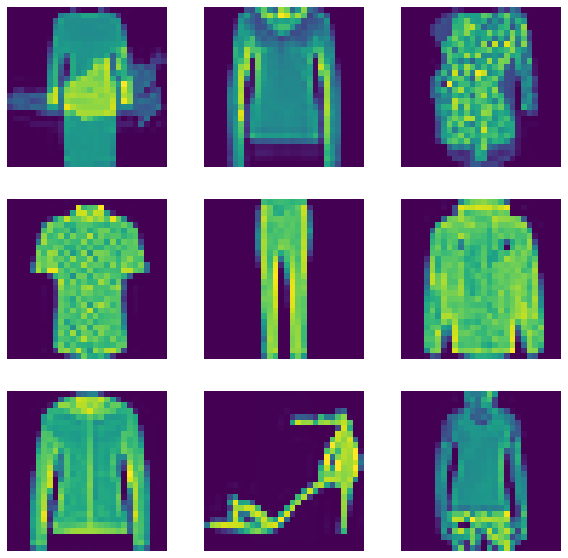

In [29]:
# First create the new dataset using our `mix_up` utility
train_ds_mu = train_ds.map(
    lambda ds_one, ds_two: mix_up(ds_one, ds_two, alpha=0.2), num_parallel_calls=AUTO
)

# Let's preview 9 samples from the dataset
sample_images, sample_labels = next(iter(train_ds_mu))
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(zip(sample_images[:9], sample_labels[:9])):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().squeeze())
    print(label.numpy().tolist())
    plt.axis("off")

# Model building

In [30]:
def get_training_model():
    model = tf.keras.Sequential(
        [
            layers.Conv2D(16, (5, 5), activation="relu", input_shape=(28, 28, 1)),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(32, (5, 5), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Dropout(0.2),
            layers.GlobalAvgPool2D(),
            layers.Dense(128, activation="relu"),
            layers.Dense(10, activation="softmax"),
        ]
    )
    return model


For the sake of reproducibility, we serialize the initial random weights of our shallow network.

In [31]:
initial_model = get_training_model()
initial_model.save_weights("initial_weights.h5")

# Train the model with the mixed up dataset

In [32]:
model = get_training_model()
model.load_weights("initial_weights.h5")
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(train_ds_mu, validation_data=val_ds, epochs=EPOCHS)
_, test_acc = model.evaluate(test_ds)
print("Test accuracy: {:.2f}%".format(test_acc * 100))

Epoch 1/10
907/907 [==============================] - 37s 40ms/step - loss: 1.1626 - accuracy: 0.6371 - val_loss: 0.6649 - val_accuracy: 0.7620
Epoch 2/10
907/907 [==============================] - 34s 37ms/step - loss: 0.9422 - accuracy: 0.7279 - val_loss: 0.5786 - val_accuracy: 0.7920
Epoch 3/10
907/907 [==============================] - 34s 37ms/step - loss: 0.8644 - accuracy: 0.7690 - val_loss: 0.4998 - val_accuracy: 0.8260
Epoch 4/10
907/907 [==============================] - 34s 37ms/step - loss: 0.8091 - accuracy: 0.7896 - val_loss: 0.4591 - val_accuracy: 0.8490
Epoch 5/10
907/907 [==============================] - 33s 37ms/step - loss: 0.7791 - accuracy: 0.8004 - val_loss: 0.4324 - val_accuracy: 0.8490
Epoch 6/10
907/907 [==============================] - 33s 37ms/step - loss: 0.7548 - accuracy: 0.8085 - val_loss: 0.4045 - val_accuracy: 0.8640
Epoch 7/10
907/907 [==============================] - 35s 38ms/step - loss: 0.7307 - accuracy: 0.8154 - val_loss: 0.3932 - val_accuracy:

# Train the model without the mixed up dataset

In [34]:
model = get_training_model()
model.load_weights("initial_weights.h5")
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# Notice that we are NOT using the mixed up dataset here
model.fit(train_ds_one, validation_data=val_ds, epochs=EPOCHS)
_, test_acc = model.evaluate(test_ds)
print("Test accuracy: {:.2f}%".format(test_acc * 100))

Epoch 1/10
907/907 [==============================] - 39s 41ms/step - loss: 0.8635 - accuracy: 0.6731 - val_loss: 0.6572 - val_accuracy: 0.7570
Epoch 2/10
907/907 [==============================] - 37s 41ms/step - loss: 0.6252 - accuracy: 0.7620 - val_loss: 0.5389 - val_accuracy: 0.8090
Epoch 3/10
907/907 [==============================] - 35s 38ms/step - loss: 0.5505 - accuracy: 0.7969 - val_loss: 0.5059 - val_accuracy: 0.8180
Epoch 4/10
907/907 [==============================] - 35s 39ms/step - loss: 0.4994 - accuracy: 0.8191 - val_loss: 0.4625 - val_accuracy: 0.8395
Epoch 5/10
907/907 [==============================] - 36s 40ms/step - loss: 0.4617 - accuracy: 0.8318 - val_loss: 0.4063 - val_accuracy: 0.8630
Epoch 6/10
907/907 [==============================] - 35s 38ms/step - loss: 0.4352 - accuracy: 0.8420 - val_loss: 0.4058 - val_accuracy: 0.8550
Epoch 7/10
907/907 [==============================] - 36s 39ms/step - loss: 0.4153 - accuracy: 0.8492 - val_loss: 0.3744 - val_accuracy: